In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchshow as ts

In [124]:
j = 3

In [3]:
def constant(j: int):
    return torch.ones(2**j, 2**j)
constant(j)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [4]:
def horizontal(j: int):
    return torch.cat((torch.ones(2**j, 2**(j-1)), -torch.ones(2**j, 2**(j-1))), dim=1)
horizontal(j)

tensor([[ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.]])

In [5]:
def vertical(j: int):
    return torch.cat((torch.ones(2**(j-1), 2**j), -torch.ones(2**(j-1), 2**j)), dim=0)
vertical(j)

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [6]:
def checker(j: int):
    return torch.cat(
        (torch.cat(
            (torch.ones(2**(j-1), 2**(j-1)), -torch.ones(2**(j-1), 2**(j-1))
            ), dim=0),
        torch.cat(
            (-torch.ones(2**(j-1), 2**(j-1)), torch.ones(2**(j-1), 2**(j-1))
            ), dim=0)
        ),dim=1)
checker(j)

tensor([[ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [-1., -1., -1., -1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1.,  1.,  1.,  1.,  1.]])

In [7]:
def haar2d_unnormalized(j: int, top_level: bool = True):
    if top_level:
        result = torch.stack((constant(j), horizontal(j), vertical(j), checker(j)), dim=0)
        freq = torch.zeros(4)
    else:
        result = torch.stack((horizontal(j), vertical(j), checker(j)), dim=0)
        freq = torch.zeros(3)
    if j > 1:
        sub, subfreq = haar2d_unnormalized(j-1, top_level=False)
        size = sub.shape[0]
        zeros = torch.zeros(size*4, 2**j, 2**j)
        zeros[:size, :2**(j-1), :2**(j-1)] = sub
        zeros[size:2*size, 2**(j-1):, :2**(j-1)] = sub
        zeros[2*size:3*size, :2**(j-1), 2**(j-1):] = sub
        zeros[3*size:, 2**(j-1):, 2**(j-1):] = sub
        result = torch.cat((result, zeros), dim=0)
        freq = torch.cat((freq, subfreq+1, subfreq+1, subfreq+1, subfreq+1), dim=0)
    return result, freq

In [8]:
def haar2d(j: int):
    H_unnormalized, freq = haar2d_unnormalized(j)
    M_unnormalized = H_unnormalized.reshape(2**j * 2**j,2**j * 2**j)
    M = M_unnormalized/torch.unsqueeze(torch.norm(M_unnormalized,dim=1),dim=1)
    H = M.reshape(2**j * 2**j, 2**j, 2**j)
    return H, freq

## Sample Image

In [122]:
def sample_images(j: int, decay: float, num: int = 1):
    n = 2**j
    N = n*n
    H, freq = haar2d(j)
    for i in range(num):
        z1 = torch.randn(N)/decay**freq
        z2 = torch.randn(N)/decay**freq
        z3 = torch.randn(N)/decay**freq
        I1 = torch.einsum("abc,a->bc", H, z1)
        I2 = torch.einsum("abc,a->bc", H, z2)
        I3 = torch.einsum("abc,a->bc", H, z3)
        I = torch.stack((I1, I2, I3), dim=0)
        if i == 0:
            Is = torch.unsqueeze(I, dim=0)
        else:
            Is = torch.cat((Is, I.unsqueeze(0)))
    return Is

## Gaussian

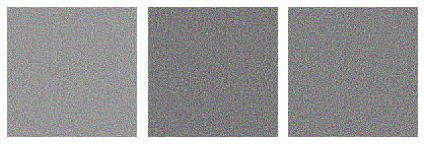

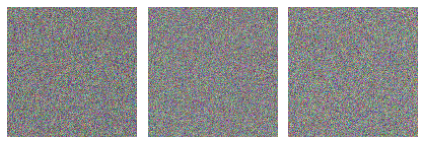

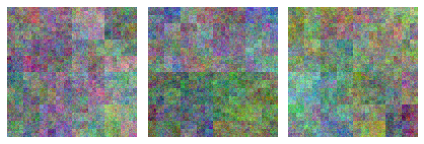

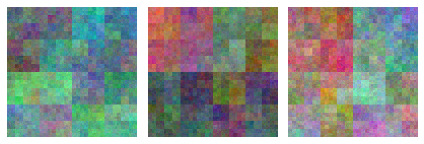

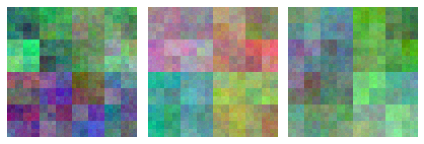

In [123]:
Is0p5 = sample_images(7,0.5,3)
Is1 = sample_images(7,1,3)
Is2 = sample_images(7,2,3)
Is2p5 = sample_images(7,2.5,3)
Is3 = sample_images(7,3,3)
ts.show(Is0p5)
ts.show(Is1)
ts.show(Is2)
ts.show(Is2p5)
ts.show(Is3)